In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import oceanspy as ospy
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [20]:
df = xr.open_dataset(r'D:\MScData\CurrentsNordicSeas.nc')
depth = xr.open_dataset(r'D:\MScData\Depth_res.nc')['Depth'].sel(Y=slice(65,79)).sel(X=slice(-30,10))

In [5]:
hor_vel = df['hor_vel']

Text(0.5, 0.98, 'Mean Horizontal velocity magnitude with maximum in Z')

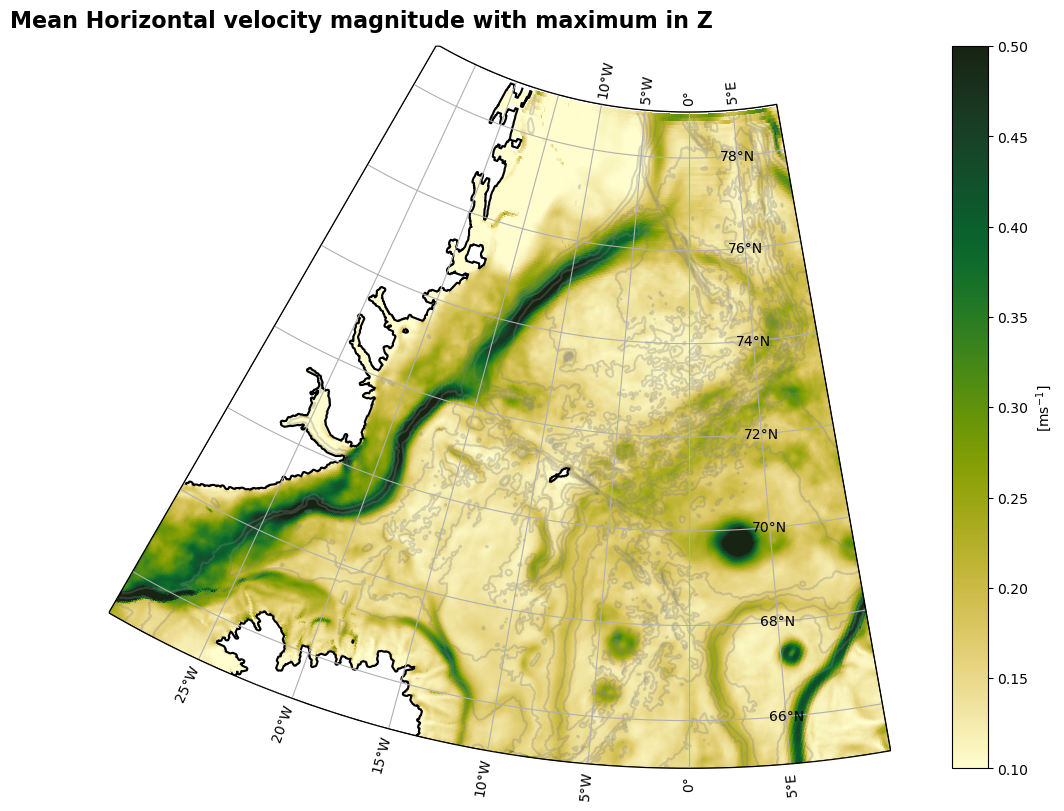

In [25]:
fig, ax = plt.subplots(figsize=(14,8),subplot_kw=dict(projection=ccrs.NorthPolarStereo()),layout='constrained')


mesh = ax.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel,vmin=0.1,vmax=0.5,cmap=cmo.speed,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh)
cbar.set_label('[ms$^{-1}$]')

ax.contour(depth.X,depth.Y,depth,colors='grey',alpha=0.3,transform=ccrs.PlateCarree())
ax.contour(depth.X,depth.Y,depth,[0],colors='black',transform=ccrs.PlateCarree())

# Set the extent to focus on the desired geographical area
extent = [-30, 10, 65, 79]

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

fig.suptitle('Mean Horizontal velocity magnitude with maximum in Z',fontweight='bold',fontsize=16)

Text(0.5, 0.98, 'Mean Horizontal velocity magnitude with maximum in Z')

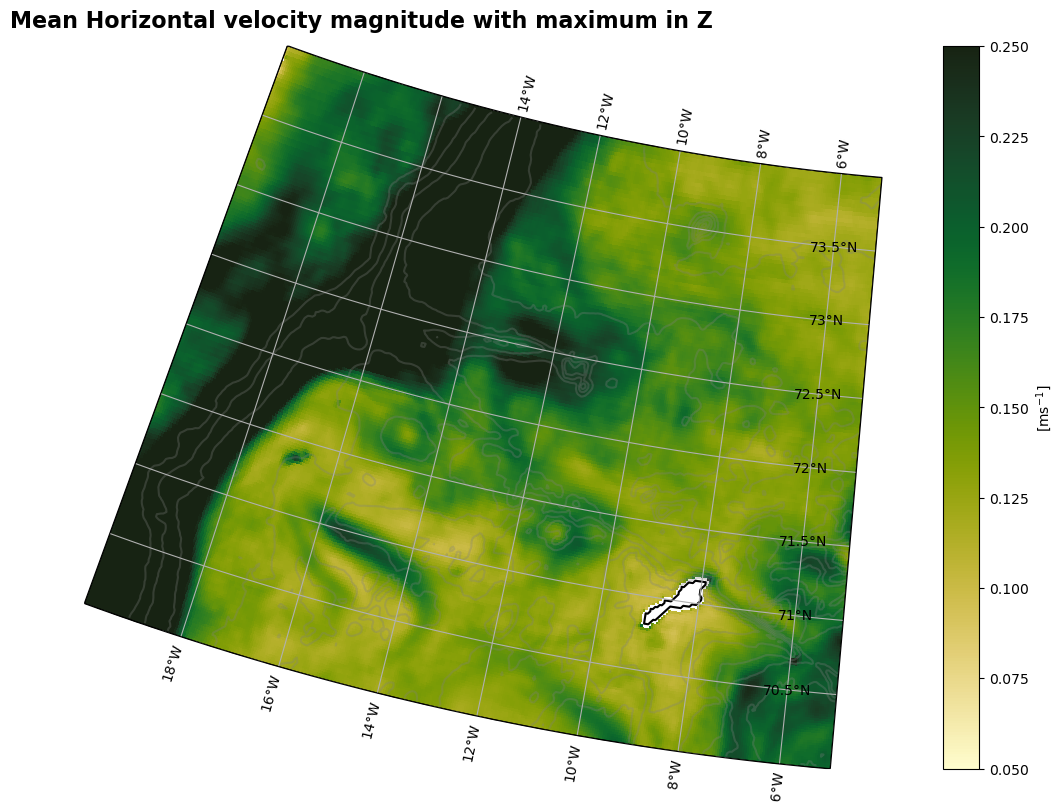

In [33]:
depth = depth.sel(Y=slice(70,74)).sel(X=slice(-20,-5))
hor_vel = hor_vel.sel(Y=slice(70,74)).sel(X=slice(-20,-5))

fig, ax = plt.subplots(figsize=(14,8),subplot_kw=dict(projection=ccrs.NorthPolarStereo()),layout='constrained')

mesh = ax.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel,vmin=0.05,vmax=0.25,cmap=cmo.speed,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh)
cbar.set_label('[ms$^{-1}$]')

ax.contour(depth.X,depth.Y,depth,colors='grey',alpha=0.3,transform=ccrs.PlateCarree())
ax.contour(depth.X,depth.Y,depth,[0],colors='black',transform=ccrs.PlateCarree())

# Set the extent to focus on the desired geographical area
extent = [-20, -5, 70, 74]

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

fig.suptitle('Mean Horizontal velocity magnitude with maximum in Z',fontweight='bold',fontsize=16)